<a href="https://colab.research.google.com/github/naman-omar/Career_Recommendation_System/blob/main/Career_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from scipy.sparse import hstack

In [2]:
# 1. Load & concatenate original + synthetic data
df = pd.read_csv("/content/AI-based Career Recommendation System - Expanded.csv")
df = df.drop('Recommendation_Score', axis=1)
df.head()

,CandidateID,Name,Age,Education,Skills,Interests,Recommended_Career
0,1,John Doe,28,Bachelor's,Python;Data Analysis;Machine Learning,Technology;Data Science,Data Scientist
1,2,Jane Smith,32,Master's,Java;System Design;Cloud Computing,Software Development;AI,Software Engineer
2,3,Bob Johnson,24,Bachelor's,Graphic Design;UI/UX;Adobe Creative Suite,Arts;Digital Media,UX Designer
3,4,Emily Davis,26,Bachelor's,Python;Deep Learning;Statistics,Healthcare;AI,AI Researcher
4,5,Michael Brown,30,Master's,Project Management;Communication;Agile,Business;Management,Project Manager


In [3]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (2000, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CandidateID         2000 non-null   int64 
 1   Name                2000 non-null   object
 2   Age                 2000 non-null   int64 
 3   Education           2000 non-null   object
 4   Skills              2000 non-null   object
 5   Interests           2000 non-null   object
 6   Recommended_Career  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [4]:
# Display summary statistics for numeric columns
df.describe()

,CandidateID,Age
count,2000.000000,2000.000000
mean,1000.500000,30.837500
std,577.494589,5.520175
min,1.000000,22.000000
25%,500.750000,26.000000
50%,1000.500000,31.000000
75%,1500.250000,36.000000
max,2000.000000,41.000000


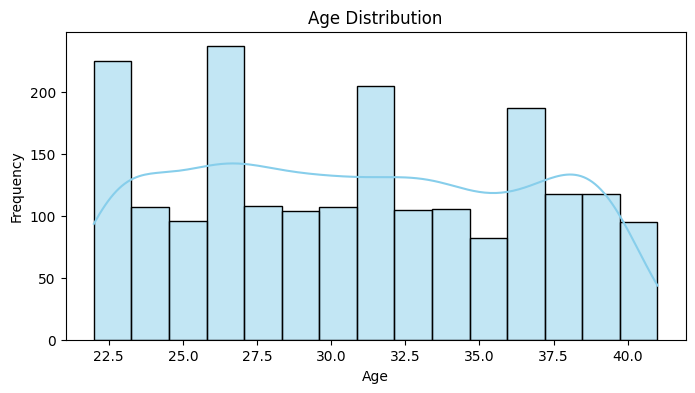

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<ipython-input-6-f4c21f75a746>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="Set2")


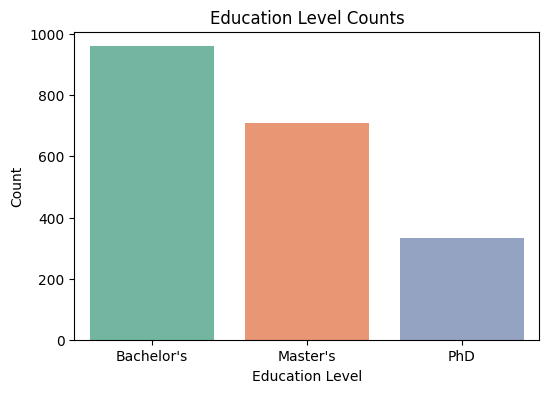

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Education", data=df, palette="Set2")
plt.title("Education Level Counts")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

<ipython-input-7-934da7cb414e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Recommended_Career", data=df, order=df["Recommended_Career"].value_counts().index, palette="Set3")


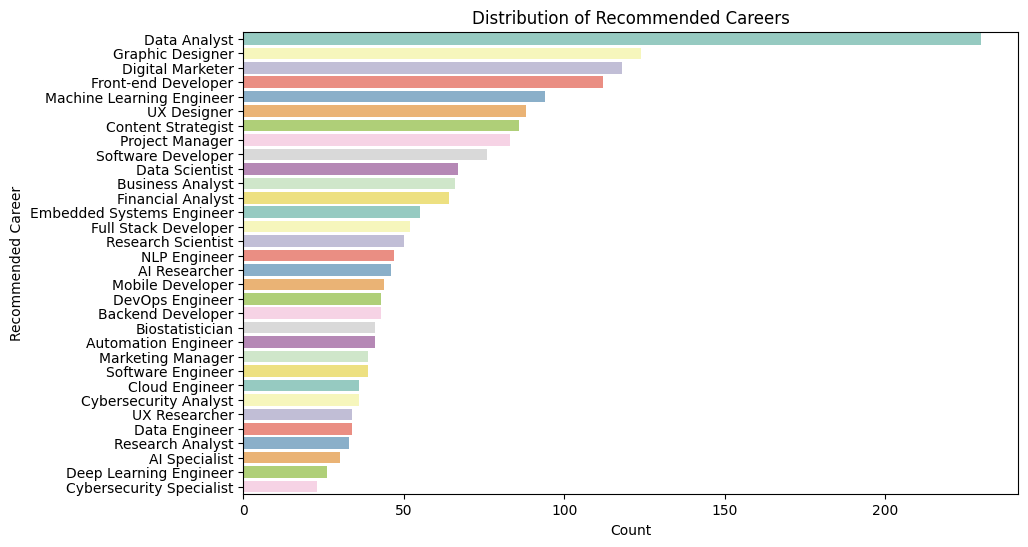

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Recommended_Career", data=df, order=df["Recommended_Career"].value_counts().index, palette="Set3")
plt.title("Distribution of Recommended Careers")
plt.xlabel("Count")
plt.ylabel("Recommended Career")
plt.show()

In [8]:
def count_items(series):
    items = series.dropna().apply(lambda x: x.split(";"))
    flat_list = [item.strip() for sublist in items for item in sublist]
    return pd.Series(flat_list).value_counts()

In [9]:
skills_count = count_items(df["Skills"])
print("Most common skills:\n", skills_count)

Most common skills:
 Python              720
Machine Learning    223
SEO                 200
JavaScript          198
Java                186
                   ... 
Adobe Photoshop       8
Content Strategy      8
NLP                   8
Adobe XD              7
UX/UI                 7
Name: count, Length: 80, dtype: int64


<ipython-input-10-291420222849>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skills_count.index, y=skills_count.values, palette="viridis")


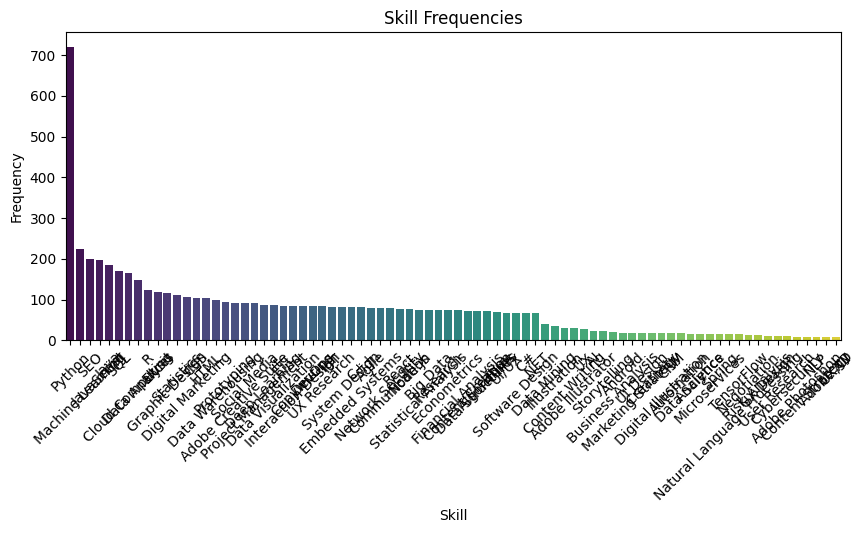

In [10]:
# Plot skills count
plt.figure(figsize=(10, 4))
sns.barplot(x=skills_count.index, y=skills_count.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Skill Frequencies")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Count Interests
interests_count = count_items(df["Interests"])
print("Most common interests:\n", interests_count)

Most common interests:
 Technology              479
Business                299
AI                      263
Finance                 260
Design                  239
Marketing               227
Analytics               213
Data Science            174
Web Development         170
Arts                    169
Management              154
Academia                150
Digital Media           129
Software Development    129
Research                127
Healthcare              122
Communications          120
Cybersecurity           108
Biotech                  49
Innovation               41
Data Analysis            36
Software Engineering     30
Electronics              29
Automation               29
Web Design               27
Content                  26
User Experience          22
Media                    22
Gaming                   21
Coding                   19
Mobile Apps              19
Engineering              18
Statistics               18
Social Media             17
Linguistics             

<ipython-input-12-ed3ba3a1591f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interests_count.index, y=interests_count.values, palette="magma")


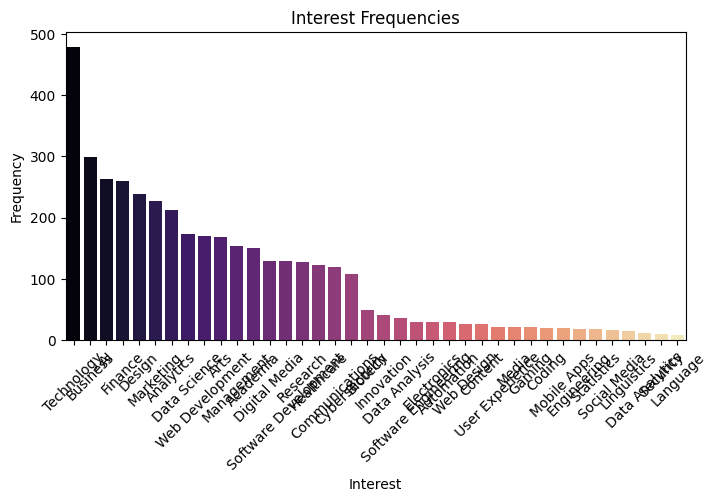

In [12]:
# Plot interests count
plt.figure(figsize=(8, 4))
sns.barplot(x=interests_count.index, y=interests_count.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Interest Frequencies")
plt.xlabel("Interest")
plt.ylabel("Frequency")
plt.show()

In [13]:
# 2. Preprocess text features
df['Text'] = df['Skills'].str.replace(';', ' ') + ' ' + df['Interests'].str.replace(';', ' ')

In [14]:
# 3. Encode Education and target
education_encoder = LabelEncoder()
career_encoder = LabelEncoder()
df['EduEnc'] = education_encoder.fit_transform(df['Education'])
y = career_encoder.fit_transform(df['Recommended_Career'])

In [15]:
# 4. Oversample to balance class distribution
max_n = df['Recommended_Career'].value_counts().max()
balanced = [resample(g, replace=True, n_samples=max_n, random_state=42) for _, g in df.groupby('Recommended_Career')]
df_bal = pd.concat(balanced)
df_bal

,CandidateID,Name,Age,Education,Skills,Interests,Recommended_Career,Text,EduEnc
1696,1697,Candidate_1697,26,Bachelor's,Python;Deep Learning;Statistics,Healthcare;AI,AI Researcher,Python Deep Learning Statistics Healthcare AI,0
1439,1440,Candidate_1440,33,Bachelor's,Java;Algorithms;Data Structures,Healthcare;AI,AI Researcher,Java Algorithms Data Structures Healthcare AI,0
508,509,Candidate_509,24,Master's,HTML;CSS;JavaScript,Healthcare;AI,AI Researcher,HTML CSS JavaScript Healthcare AI,1
1931,1932,Candidate_1932,30,Bachelor's,Java;Algorithms;Data Structures,Healthcare;AI,AI Researcher,Java Algorithms Data Structures Healthcare AI,0
276,277,Candidate_277,39,Bachelor's,Java;Algorithms;Data Structures,Healthcare;AI,AI Researcher,Java Algorithms Data Structures Healthcare AI,0
...,...,...,...,...,...,...,...,...,...
560,561,Candidate_561,31,Master's,UX Research;Prototyping;Interaction Design,Design;User Experience,UX Researcher,UX Research Prototyping Interaction Design Des...,1
1265,1266,Candidate_1266,33,Bachelor's,Copywriting;SEO;Social Media,Finance;Analytics,UX Researcher,Copywriting SEO Social Media Finance Analytics,0
1265,1266,Candidate_1266,33,Bachelor's,Copywriting;SEO;Social Media,Finance;Analytics,UX Researcher,Copywriting SEO Social Media Finance Analytics,0
1790,1791,Candidate_1791,30,Master's,UX Research;Prototyping;Interaction Design,Design;User Experience,UX Researcher,UX Research Prototyping Interaction Design Des...,1


In [16]:
# 5. Feature extraction
tfidf = TfidfVectorizer(max_features=150)
X_text = tfidf.fit_transform(df_bal['Text'])
X_num = df_bal[['Age', 'EduEnc']].values
X = hstack([X_text, X_num])
y_bal = career_encoder.transform(df_bal['Recommended_Career'])

In [17]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

In [18]:
# 7. Train model with grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'max_features': ['sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [19]:
# 8. Best model
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
print("Best params:", grid.best_params_)

Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [20]:
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.9211956521739131


In [21]:
# 9. Predict on sample input
sample = {
    'Name': 'John Doe',
    'Age': 22,
    'Skills': 'Python;Machine Learning;Data Analysis',
    'Education': "Bachelor's",
    'Interests': 'AI;Research;Statistics'
}
sample_df = pd.DataFrame([sample])
sample_df['Text'] = sample_df['Skills'].str.replace(';', ' ') + ' ' + sample_df['Interests'].str.replace(';', ' ')
sample_df['EduEnc'] = education_encoder.transform(sample_df['Education'])
X_text_sample = tfidf.transform(sample_df['Text'])
X_num_sample = sample_df[['Age', 'EduEnc']].values
X_sample = hstack([X_text_sample, X_num_sample])
pred_class = best_rf.predict(X_sample)[0]
career_label = career_encoder.inverse_transform([pred_class])[0]

print("Recommended Career:", career_label)

Recommended Career: AI Researcher


In [22]:
import pickle

In [23]:
pickle.dump(grid, open('model.pkl', 'wb'))